In [11]:
# Appeding the path to the scaman package
import sys
sys.path.append('/Users/berke/Codes/scaman/scaman')

In [12]:
import random
import numpy as np
from utils.intrinsic_dimension_estimator import Estimator
from sklearn.datasets import make_low_rank_matrix

In [13]:
# Step 1: Generate toy data matrix
#X = np.random.randn(5000, 500)
X = make_low_rank_matrix(500, 50, effective_rank=12,
                         tail_strength=0.05, random_state=123)  # random state for reproducibility
X = np.asarray(X)

In [14]:
# Step 2: Center data matrix
means = np.mean(X, axis=0)
X_centered = X - means

In [15]:
# Step 3: Verify that covariance matrix is centered
assert np.allclose(np.mean(X_centered, axis=0), np.zeros_like(means))

In [16]:
# Step 4: Compute covariance matrix
cov = np.cov(X, rowvar=False)
eigs = np.linalg.eig(cov)[0]
eigs_sorted = np.flip(np.sort(eigs))
variances = np.cumsum(eigs_sorted)/np.sum(eigs_sorted)
tv = 0.8
actual_dim = np.argmax(np.array(variances)>tv)
print(eigs_sorted)

[2.00217861e-03 1.97470443e-03 1.89559836e-03 1.77351154e-03
 1.61715460e-03 1.43374900e-03 1.24032724e-03 1.03297340e-03
 8.62106255e-04 6.91373787e-04 5.40983000e-04 4.15722707e-04
 3.06368033e-04 2.28091025e-04 1.66147362e-04 1.18251854e-04
 8.35183567e-05 5.86382560e-05 4.10440329e-05 2.86209516e-05
 2.05345226e-05 1.49443450e-05 1.11470385e-05 8.52737164e-06
 6.81856864e-06 5.60370293e-06 4.80089136e-06 4.22705988e-06
 3.82323757e-06 3.53024644e-06 3.30684437e-06 3.16978373e-06
 3.05791277e-06 2.96431231e-06 2.88971591e-06 2.82439427e-06
 2.76233542e-06 2.71411551e-06 2.66450571e-06 2.58979558e-06
 2.57425520e-06 2.52825763e-06 2.48488845e-06 2.44595874e-06
 2.40152073e-06 2.35709835e-06 2.32650004e-06 2.28653915e-06
 2.21515349e-06 2.19329669e-06]


In [17]:
# Step 5: Create Estimator instance
estimator = Estimator(X_centered, p=20, nk=8, epsilon=0.1, delta=0.1, tv = tv)
#print(estimator.eigenvalueCountEstimator(X_centered,70,0.1,0.1,0.00016,0.00019,eigs_sorted[49]*0.9,eigs_sorted[0]*1.1))
estDim, estVar, estDimF = estimator.estimator()
print(f"Actual Dim = {actual_dim}, Estimated Dim = {estDim}, Estimated Var = {estVar}, Estimated Final Dim = {estDimF}")

a:  0.3333333333333332
b:  0.8666666666666663
a:  0.47879855916591935
b:  0.3333333333333332
a:  0.5508776931697253
b:  0.47879855916591935
a:  -0.0347634887200538
b:  0.5508776931697253
a:  -0.21303240639815643
b:  -0.0347634887200538
a:  -0.5828313605021902
b:  -0.21303240639815643
a:  -0.7233538715646164
b:  -0.5828313605021902
Actual Dim = 8, Estimated Dim = 12, Estimated Var = 0.8137050445683934, Estimated Final Dim = 12


Petsc matrix formed

******************************
*** SLEPc Solution Results ***
******************************

Number of iterations of the method: 7
Solution method: arnoldi
Number of requested eigenvalues: 12
Stopping condition: tol=1e-09, maxit=10000
Number of converged eigenpairs 12

Eigenpairs:
        k          ||Ax-kx||/||kx|| 
----------------- ------------------
     0.000000            58.056
     0.995574       3.36716e-15
     0.996067       2.76507e-14
     0.996473       6.06421e-13
     0.996754       7.66848e-12
     0.996873       1.02029e-11
     0.998304       3.60658e-11
     0.998896       1.47053e-15
     0.999208       1.74063e-15
     0.999650       4.95974e-14
     1.000282       2.79622e-11
     1.000488       3.48871e-12



/opt/homebrew/anaconda3/envs/scaman-env/lib/python3.9/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


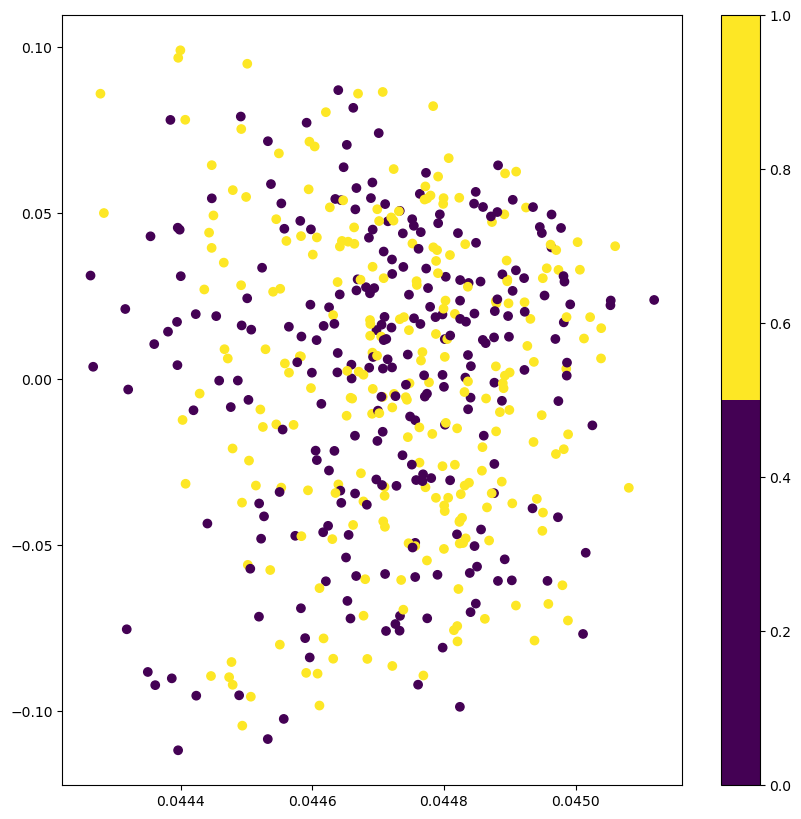

Embedding shape = (500, 12)


In [23]:
## Creating test with slepc solver with estimated dimension
# Create an instance of the LE class
from serial.le import LE
le = LE(X, n_components=estDim, k=12, solver='slepc',slepc_solver='ARNOLDI',sigma= 1,normalize=True)
embedding_le = le.fit_transform()
le.plot_2d(embedding_le)
print(f"Embedding shape = {embedding_le.shape}")



Petsc matrix formed

******************************
*** SLEPc Solution Results ***
******************************

Number of iterations of the method: 1
Solution method: krylovschur
Number of requested eigenvalues: 12
Stopping condition: tol=0.01, maxit=1000
Number of converged eigenpairs 21

Eigenpairs:
        k          ||Ax-kx||/||kx|| 
----------------- ------------------
     0.002002       5.76422e-16
     0.001975       1.01198e-15
     0.001896        6.4099e-16
     0.001774       6.54209e-16
     0.001617       6.33192e-16
     0.001434       8.63612e-16
     0.001240       8.62899e-16
     0.001033        7.9712e-16
     0.000862       9.51036e-16
     0.000691       1.42518e-15
     0.000541       1.72848e-15
     0.000416       2.05141e-15
     0.000306        4.5499e-13
     0.000228       9.52144e-13
     0.000166       1.87157e-10
     0.000118       3.09063e-09
     0.000084       3.82163e-08
     0.000059       5.27083e-06
     0.000041       2.58404e-05
     0.00002

/opt/homebrew/anaconda3/envs/scaman-env/lib/python3.9/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


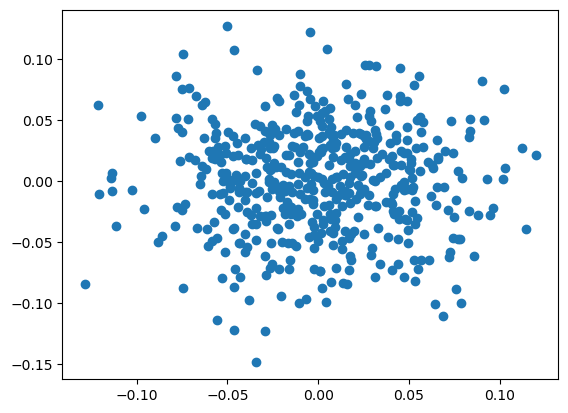

Embedding shape = (500, 12)


In [24]:
## Created test with estimated dimension and PCA
from serial.pca import PCA
pca = PCA(n_components=estDim,eig_method='slepc',tol=0.01,max_it=1000)
embedding_pca = pca.fit_transform(X)
#plot the embedding with the first two components
from matplotlib import pyplot as plt
plt.scatter(embedding_pca[:,0],embedding_pca[:,1])
plt.show()
print(f"Embedding shape = {embedding_pca.shape}")

